In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('covid_19_data.csv')

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.shape

(95284, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95284 entries, 0 to 95283
Data columns (total 8 columns):
SNo                95284 non-null int64
ObservationDate    95284 non-null object
Province/State     64803 non-null object
Country/Region     95284 non-null object
Last Update        95284 non-null object
Confirmed          95284 non-null float64
Deaths             95284 non-null float64
Recovered          95284 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.8+ MB


In [7]:
df.nunique()

SNo                95284
ObservationDate      217
Province/State       723
Country/Region       223
Last Update         1958
Confirmed          26383
Deaths              6354
Recovered          16646
dtype: int64

In [9]:
df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [10]:
df['Province/State'].value_counts()

Unknown                         764
Diamond Princess cruise ship    370
Grand Princess                  328
Amazonas                        278
Hebei                           219
                               ... 
Charlotte County, FL              1
Jervis Bay Territory              1
Collin County, TX                 1
Harrison County, KY               1
Fench Guiana                      1
Name: Province/State, Length: 723, dtype: int64

In [11]:
df.count()

SNo                95284
ObservationDate    95284
Province/State     64803
Country/Region     95284
Last Update        95284
Confirmed          95284
Deaths             95284
Recovered          95284
dtype: int64

In [12]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     30481
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt  ## for visualization so that it look more interactive.

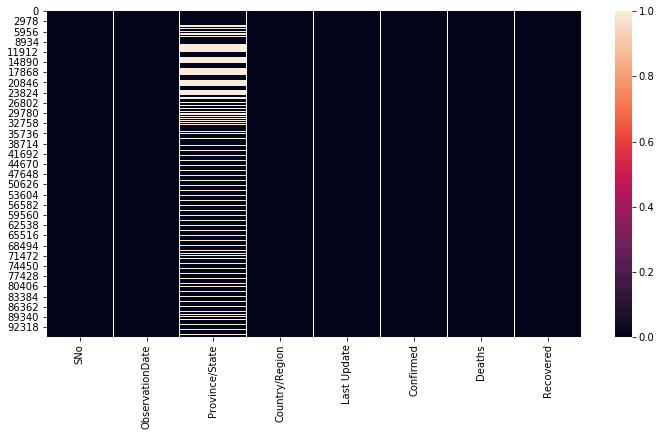

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [16]:
df1=df.groupby('Country/Region').sum().head(10)
df1

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Azerbaijan,2664,1.0,0.0,0.0
"('St. Martin',)",4675,2.0,0.0,0.0
Afghanistan,6893502,3016644.0,87798.0,1569017.0
Albania,6850245,392178.0,11623.0,220905.0
Algeria,6890439,2221441.0,116245.0,1478914.0
Andorra,6876136,122714.0,6945.0,93571.0
Angola,6789938,71110.0,3267.0,23740.0
Antigua and Barbuda,6833025,7163.0,413.0,4886.0
Argentina,6872587,12053923.0,245544.0,6321410.0


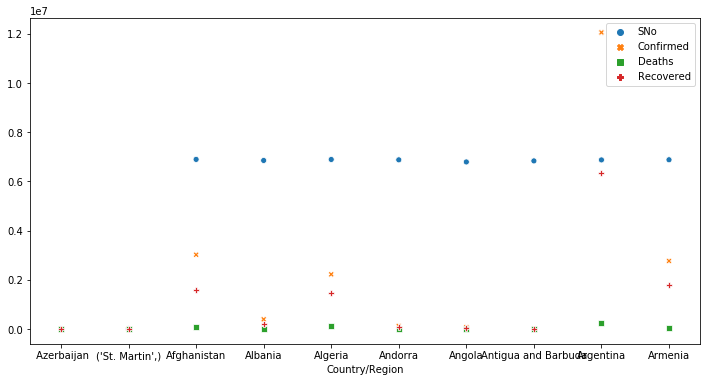

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1)

In [18]:
# remove all the records where confirmed cases is less than 10

df=df[~(df.Confirmed < 10)]

In [19]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
13,14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0
34,35,01/22/2020,Zhejiang,Mainland China,1/22/2020 17:00,10.0,0.0,0.0
39,40,01/23/2020,Beijing,Mainland China,1/23/20 17:00,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95279,95280,08/25/2020,Zaporizhia Oblast,Ukraine,2020-08-26 04:28:11,1407.0,24.0,767.0
95280,95281,08/25/2020,Zeeland,Netherlands,2020-08-26 04:28:11,1024.0,70.0,0.0
95281,95282,08/25/2020,Zhejiang,Mainland China,2020-08-26 04:28:11,1277.0,1.0,1268.0
95282,95283,08/25/2020,Zhytomyr Oblast,Ukraine,2020-08-26 04:28:11,2923.0,60.0,1753.0


In [20]:
# Find out in which region maximum number of cases been recorded
confirmed_data=df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(15)
confirmed_data

Country/Region
US              372667312.0
Brazil          179803832.0
India           108952271.0
Russia           71355949.0
Spain            37193505.0
UK               36523608.0
Italy            34053836.0
Peru             33508332.0
Mexico           29168934.0
Iran             28939007.0
France           28570431.0
Germany          27467397.0
South Africa     27298784.0
Chile            27061385.0
Turkey           24968116.0
Name: Confirmed, dtype: float64

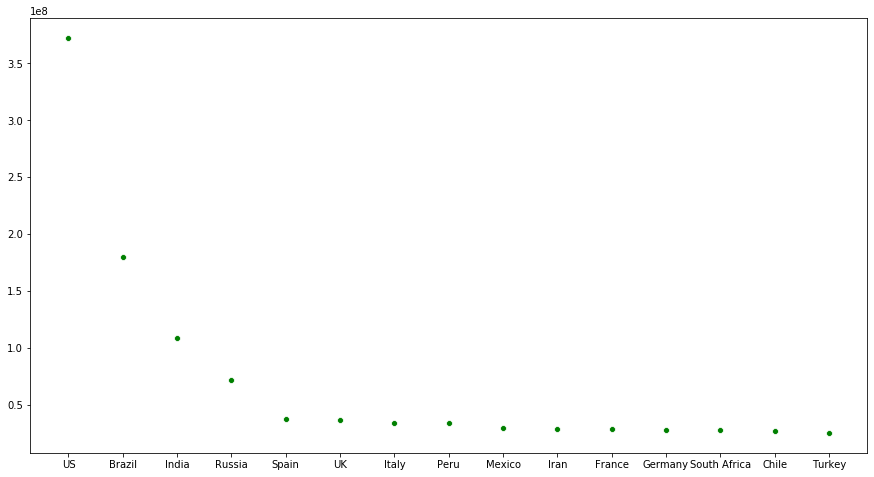

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=confirmed_data,color='g')

In [23]:
# Find out in which region maximum number of death is been recorded
death_data=df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
death_data

Country/Region
US        15648269.0
Brazil     6927587.0
UK         5232221.0
Italy      4730373.0
France     3929102.0
Spain      3862577.0
Mexico     3279968.0
India      2455407.0
Iran       1567143.0
Peru       1315793.0
Name: Deaths, dtype: float64

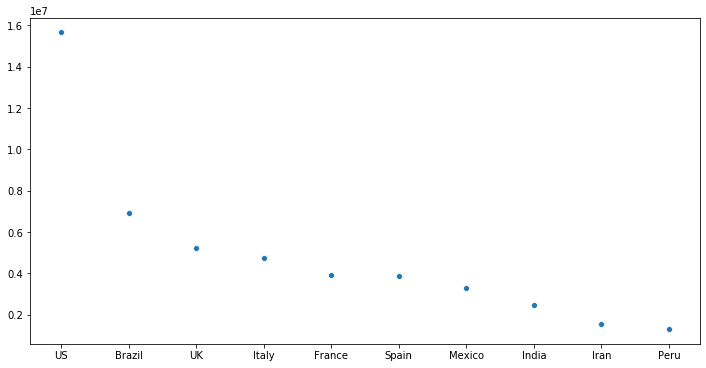

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=death_data)

In [25]:
#  Find out in which region maximum no of recoveries are recorded
recover_data=df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(15)
recover_data

Country/Region
Brazil            122016980.0
India              72114854.0
Russia             45451993.0
Iran               23515953.0
Germany            22879716.0
Mexico             22554573.0
Italy              21547598.0
Turkey             19889215.0
Chile              18719829.0
Spain              18486812.0
South Africa       18057686.0
Saudi Arabia       15916378.0
Pakistan           14480175.0
Mainland China     13901326.0
Colombia            9978779.0
Name: Recovered, dtype: float64

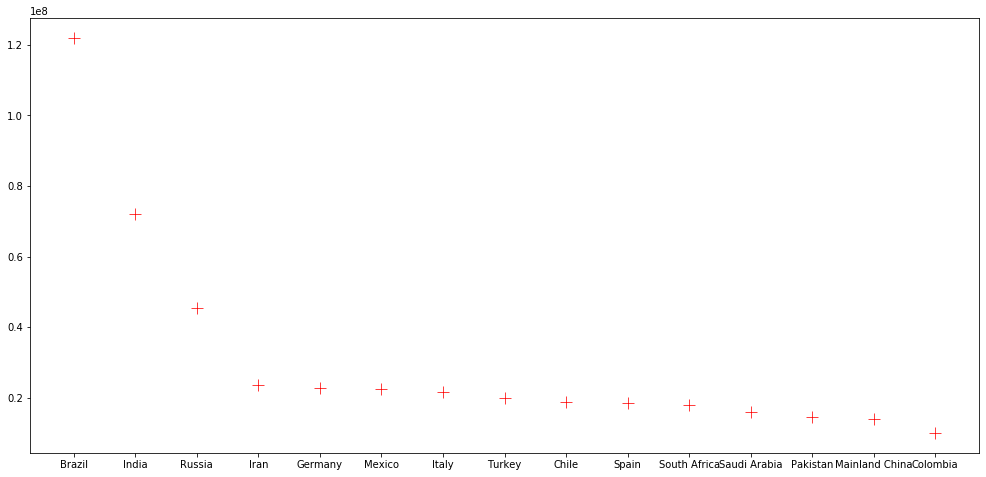

In [26]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=recover_data,color='r',marker='+',s=150)

In [28]:
# Find out in which region min no of deaths recorded
min_deaths=df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=True).head(10)

In [29]:
min_deaths

Country/Region
occupied Palestinian territory      0.0
Saint Vincent and the Grenadines    0.0
Bhutan                              0.0
Saint Lucia                         0.0
Saint Kitts and Nevis               0.0
Reunion                             0.0
Republic of Ireland                 0.0
Palestine                           0.0
Dominica                            0.0
Eritrea                             0.0
Name: Deaths, dtype: float64

In [32]:
#No of confirmed,deaths and recovered cases  from indian till 29 april 2020
india_df=df[df['Country/Region'] == 'India']

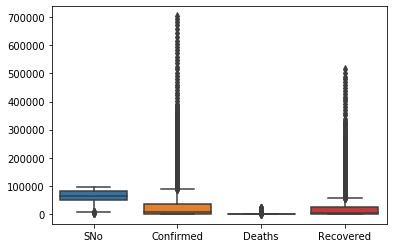

In [33]:
sns.boxplot(data=india_df)